In [7]:
using Pkg

Pkg.activate("/Users/pluo/Desktop/Harvard/2.5/PRISE/Project/MatchgateGAN")

using Yao, Yao.EasyBuild
using FLOYao
using BenchmarkTools

N = 40 #Number of qubits
layers = 5

matchgate = chain(N) 
for _ in 1:layers
    for i in 1:N-1
        push!(matchgate, rot(kron(N, i => X, i+1 => X), 0.))
    end
    for i in 1:N-1
        push!(matchgate, rot(kron(N, i => Y, i+1 => Y), 0.))
    end
    for i in 1:N
        push!(matchgate, put(N, i => Rz(0.)))
    end
end
dispatch!(matchgate, :random)
println("Number of parameters in matchgate circuit: ", nparameters(matchgate))

reg = FLOYao.zero_state(N) 
t = time()
@benchmark reg |> matchgate |> measure
#println("Time elapsed: ", time() - t)

  Activating project at `~/Desktop/Harvard/2.5/PRISE/Project/MatchgateGAN`


Number of parameters in matchgate circuit: 590


BenchmarkTools.Trial: 634 samples with 1 evaluation.
 Range (min … max):  600.041 μs …   1.001 s  ┊ GC (min … max):  0.00% … 99.77%
 Time  (median):     866.895 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):     7.828 ms ± 54.031 ms  ┊ GC (mean ± σ):  82.48% ± 15.07%

  █                                                             
  █▇▄▅▄▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▄▄▁▄▁▄▄▁▁▄ ▆
  600 μs        Histogram: log(frequency) by time       180 ms <

 Memory estimate: 1.10 MiB, allocs estimate: 3466.

In [8]:
general = variational_circuit(N, layers)
dispatch!(general, :random)
println("Number of parameters in general variational circuit: ", nparameters(general))

reg = Yao.zero_state(N)
t = time()
@benchmark reg |> general |> measure
#reg |> general |> measure |> println
#println("Time elapsed: ", time() - t)

Number of parameters in general variational circuit: 640


InterruptException: InterruptException:

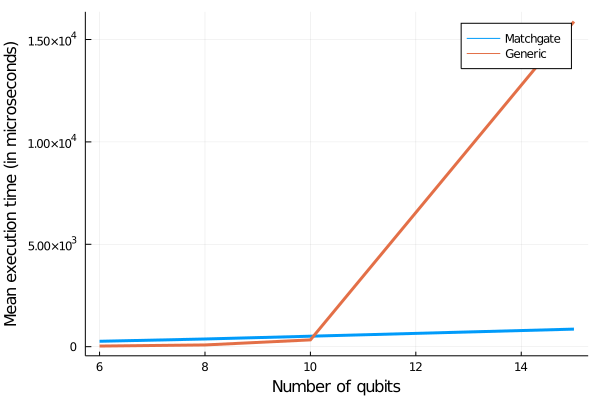

In [9]:
using Plots

nq = [6,8,10,15,20]
m = [263.834,375.771,511.766,858.112,1276]
g = [30.416,85.092,332.307,15877,615025]

stop = 4
plot(nq[1:stop], [m[1:stop],g[1:stop]], xlabel = "Number of qubits", ylabel = "Mean execution time (in microseconds)", label=["Matchgate" "Generic"], linewidth = 3)